In [1]:
import pylab
import numpy as np
from qiskit import BasicAer
from qiskit.tools.visualization import plot_histogram
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle, TruthTableOracle

In [2]:
# Example 3-SAT Problem
input_3sat_instance = '''
c example DIMACS-CNF 3-SAT
p cnf 3 5
-1 -2 -3 0
1 -2 3 0
1 2 -3 0
1 -2 -3 0
-1 2 3 0
'''

In [3]:
# Next use the LogicalExpressionOracle to construct the circuit, since it can take DIMACS-CNF formatted strings.
oracle = LogicalExpressionOracle(input_3sat_instance)

grover = Grover(oracle)

In [4]:
# Configure the backend to run the Oracle
backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024)
result = grover.run(quantum_instance)

print(result.assignment)
# expressed using the DIMACS notation:
#      1 -2 3, or -1 -2 -3, or 1 2 -3

[1, 2, -3]


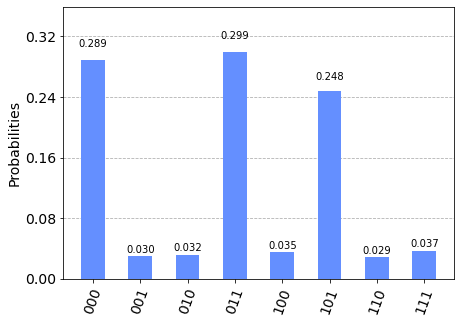

In [5]:
# Let's see the results as a histogram.
plot_histogram(result.measurement)

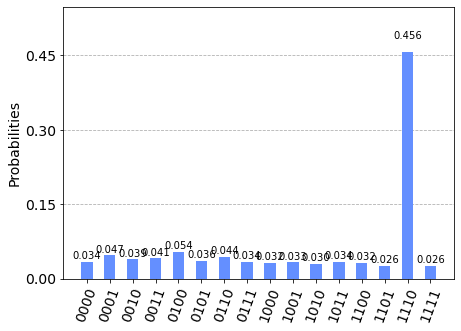

In [6]:
                                ### Using Boolean Expressions as Oracle input. ###
    
## where ^, ~, and & represent the Boolean logical XOR, NOT, and AND operators ##
## w ^ x calls for w and x taking different values; ~(y ^ z) requires y and z be the same; 
#     x & y & z dictates all three to be True. ##

## (w, x, y, z) = (False, True, True, True)
expression = '(w ^ x) & ~(y ^ z) & (x & y & z)'

## Input the Boolean Expressions into the oracle.
oracle = LogicalExpressionOracle(expression)
grover = Grover(oracle)
result = grover.run(QuantumInstance(BasicAer.get_backend('qasm_simulator'), shots=1024))
plot_histogram(result.measurement)

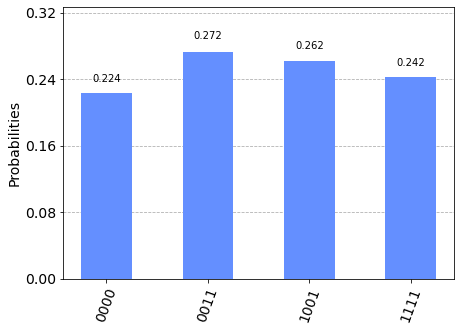

In [11]:
                                ### Constructing Oracles from Truth Tables ###
truthtable = '1001000001000001' # 16char long; 4 input qubits

oracle = TruthTableOracle(truthtable)
grover = Grover(oracle)
result = grover.run(QuantumInstance(BasicAer.get_backend('qasm_simulator'), shots=1024))
plot_histogram(result.measurement)